In [1]:
# project: p5
# submitter: kfharrison
# partner: none
# hours: 20

In [2]:
from edgar_utils import lookup_region
from edgar_utils import Filing
import operator
import pandas as pd
import geopandas as gpd
import zipfile
from graphviz import Graph, Digraph
import re, netaddr

In [3]:
#q1


df = pd.read_csv("server_log.zip")
int(sum(df["size"]))

24801002666

In [4]:
#q2

dictionary = {}
for value in df["ip"].to_dict().values():
    if value not in dictionary:
        dictionary[value] = 1
    else:
        dictionary[value] += 1

# sorted_dictionary = sorted(dictionary, ascend = True)
# print(sorted_dictionary[0], "this is the sorted version")
# dictionary

updated_dict = {}
import operator
sorted_d = dict(sorted(dictionary.items(), key=operator.itemgetter(1),reverse=True))

top_ten = list(sorted_d)[:10]
for key in sorted_d:
    if key in top_ten:
        updated_dict[key] = sorted_d.get(key)
updated_dict

{'54.152.17.ccg': 12562,
 '183.195.251.hah': 6524,
 '52.45.218.ihf': 5562,
 '68.180.231.abf': 5493,
 '204.212.175.bch': 4708,
 '103.238.106.gif': 4428,
 '208.77.215.jeh': 3903,
 '208.77.214.jeh': 3806,
 '217.174.255.dgd': 3551,
 '82.13.163.caf': 3527}

In [5]:
#q3


errors = 0
total = 0
for value in df["code"].to_dict().values():
    total += 1
    if int(value) >= 400:
        errors += 1
errors/total

0.03466852724527611

In [6]:
#q4

# forms a dictoray of accessed files
accessed_files = {}
for row in df.itertuples():
    # sets up the string to be stored
    cik = str(int(row.cik))
    accession = row.accession
    extention = row.extention
    file = cik+ "/" + accession + "/" + extention
    # print(type(row))
    # print(row)
    # print(file)
   
    # stores the files and their occurence count in accessed_files as dictionary
    if file not in accessed_files:
        accessed_files[file] = 1
    else:
        accessed_files[file] += 1

# sorts the files
a = sorted(accessed_files.items(), key=lambda x: x[1], reverse = True)  
##
ab = dict(a)

# Code modified from https://www.geeksforgeeks.org/python-get-first-n-keyvalue-pairs-in-given-dictionary/
out = dict(list(ab.items())[0: 1])

#print(str(out.keys()))
str(out.keys())[12:-3]
#print(type(str(out.keys())))




'1627631/0001627631-15-000004/.txt'

In [7]:
#Q5

int(df["crawler"].sum())

971

In [8]:
#Q6
    
counting_dictionary = {}
for ip in dictionary.keys():
    if lookup_region(ip) not in counting_dictionary:
        counting_dictionary[lookup_region(ip)] = 1
    else:
        counting_dictionary[lookup_region(ip)] += 1

sorted_dict = dict(sorted(counting_dictionary.items(), key=operator.itemgetter(1),reverse=True))

top_one = list(sorted_dict)[0]

# counting_dictionary
top_one

'United States of America'

In [9]:
#Q7

counting_dictionary = {}

for ip in df["ip"].to_dict().values():
    if lookup_region(ip) not in counting_dictionary:
        counting_dictionary[lookup_region(ip)] = {} 
        
    if ip not in counting_dictionary[lookup_region(ip)]: #is not in the value dict of a region
        counting_dictionary[lookup_region(ip)][ip] = 1
    else:
        counting_dictionary[lookup_region(ip)][ip] += 1


        
counting_dictionary      
# for big_value in counting_dictionary:
#     for small_value in counting_dictionary[big_value]:
#         print(small_value.keys())
   

final_dict = {}
for region in counting_dictionary.keys():
    #print(region)
    total = 0
    high_volume = 0
    for ip in counting_dictionary[region].values():
        #print(ip)
        total += 1
        if ip > 1000:
            high_volume += 1
        final_dict[region] = high_volume/total


final_dict
    

{'United States of America': 0.019862490450725745,
 'China': 0.006864988558352402,
 'Hong Kong': 0.0,
 'Ireland': 0.3125,
 'Canada': 0.017857142857142856,
 'United Kingdom of Great Britain and Northern Ireland': 0.06666666666666667,
 'Czechia': 0.0,
 'Germany': 0.0,
 'Bulgaria': 0.3333333333333333,
 'France': 0.0036900369003690036,
 'India': 0.058823529411764705,
 'Korea (Republic of)': 0.2,
 'Australia': 0.07692307692307693,
 'Spain': 0.0,
 'Netherlands': 0.0,
 'Sweden': 0.0,
 'Sudan': 0.0,
 'Estonia': 0.0,
 'Russian Federation': 0.0,
 'Tanzania, United Republic of': 0.0,
 'Yemen': 0.0,
 'Algeria': 0.0,
 'Ukraine': 0.0,
 'Slovakia': 0.0,
 'Viet Nam': 0.0,
 'Denmark': 0.0,
 'Singapore': 0.0,
 'Switzerland': 0.0,
 'Thailand': 0.0,
 'South Africa': 0.0,
 'Italy': 0.0,
 'Poland': 0.0,
 'Taiwan (Province of China)': 0.0,
 'Brazil': 0.0,
 'Morocco': 0.0,
 'Malaysia': 0.0,
 'Hungary': 0.0,
 'Japan': 0.0,
 'Luxembourg': 0.0,
 'Romania': 0.0,
 'Liberia': 0.0,
 'Israel': 0.0,
 'Bangladesh': 0.0

In [10]:
#Q8

zf = zipfile.ZipFile("docs.zip")

zf.namelist()
dict_html = {}

for value in zf.namelist():
    if "htm" in value or "html" in value:
        with zf.open(value) as f:
            dict_html[value] = Filing(str(f.read(), "utf-8"))
            
            
        # f = open(value)
        # html_value = f.read(value)
        # f.close()
        # dict_html[value] = Filing(str(html_value, "utf-8"))

#f.close()

zf.close()
dict_html["850693/0000850693-07-000159/-index.htm"].dates

# dict_html["850693/0000850693-07-000159/-index.htm"]

# for key in dict_html:
#     print(key)

['2007-07-25', '2007-07-25', '2007-07-23']

In [11]:
#Q9


#what is the distribution of states for the filings in docs.zip


states_dictionary = {}

#print(dict_html[key].state())

for key in dict_html:
    if dict_html[key].state() not in states_dictionary:
        if dict_html[key].state() != None: #is not in the value dict of a region
            states_dictionary[dict_html[key].state()] = 1
    else:
        states_dictionary[dict_html[key].state()] += 1


        
states_dictionary

{'OX': 6,
 'NJ': 23,
 'MS': 1,
 'MA': 30,
 'CA': 91,
 'CO': 25,
 'NY': 83,
 'TX': 64,
 'FL': 21,
 'AL': 1,
 'IN': 4,
 'CT': 14,
 'UT': 5,
 'MD': 13,
 'KS': 5,
 'VA': 15,
 'OH': 10,
 'SD': 1,
 'DE': 10,
 'IL': 25,
 'GA': 8,
 'NC': 9,
 'PA': 25,
 'TN': 4,
 'MN': 15,
 'NM': 1,
 'KY': 2,
 'OK': 7,
 'AR': 1,
 'NV': 6,
 'VT': 1,
 'MO': 4,
 'MI': 11,
 'NE': 2,
 'IA': 6,
 'AZ': 5,
 'WI': 9,
 'LA': 2,
 'ID': 1,
 'OR': 2,
 'WV': 2,
 'WA': 3,
 'DC': 1,
 'ME': 1}

In [12]:
#Q10


# : what is the distribution of SIC codes for the filings in docs.zip





sic_dictionary = {}

#print(dict_html[key].state())

for key in dict_html:
    if dict_html[key].sic not in sic_dictionary:
        if dict_html[key].sic != None: #is not in the value dict of a region
            sic_dictionary[dict_html[key].sic] = 1
    else:
        sic_dictionary[dict_html[key].sic] += 1


        
sic_dictionary

{2834: 40,
 6022: 20,
 1311: 20,
 6189: 17,
 6211: 17,
 8731: 2,
 1389: 19,
 7370: 7,
 3571: 1,
 7361: 1,
 3674: 5,
 4931: 5,
 1040: 2,
 2810: 2,
 7389: 11,
 3140: 1,
 7374: 4,
 6200: 1,
 7381: 1,
 3620: 3,
 3841: 6,
 4941: 1,
 5621: 1,
 7330: 1,
 6199: 8,
 6798: 20,
 2510: 4,
 3990: 2,
 1700: 5,
 7371: 6,
 5940: 2,
 4522: 5,
 1731: 2,
 6311: 2,
 8082: 2,
 2836: 13,
 6021: 20,
 1000: 11,
 4911: 8,
 6324: 2,
 8051: 1,
 6035: 4,
 3550: 1,
 4813: 4,
 6321: 2,
 2890: 1,
 3845: 2,
 2860: 8,
 1221: 2,
 3669: 2,
 6411: 1,
 5900: 2,
 2320: 1,
 6221: 3,
 6331: 10,
 2070: 1,
 8742: 5,
 3829: 3,
 900: 5,
 5500: 2,
 7372: 11,
 6770: 1,
 4841: 2,
 4833: 1,
 7384: 1,
 6799: 3,
 3826: 5,
 8711: 2,
 5160: 1,
 5944: 1,
 3420: 3,
 3510: 3,
 5960: 1,
 3842: 4,
 8062: 3,
 6029: 11,
 7320: 1,
 5172: 2,
 1382: 2,
 3663: 4,
 1400: 3,
 7822: 1,
 2024: 1,
 2080: 1,
 7812: 2,
 4922: 2,
 2030: 1,
 3576: 3,
 2711: 1,
 3578: 1,
 3679: 2,
 2842: 1,
 4899: 1,
 100: 1,
 3541: 1,
 7311: 1,
 3317: 1,
 2033: 1,
 3721: 1

In [13]:
#Q11


#what is the distribution of requests across industries

sic_dictionary_2 = {}

for key in ab:
    if key in dict_html:
        
        #print(dict_html[key].sic)
        if dict_html[key].sic not in sic_dictionary_2:
            if dict_html[key].sic != None: #is not in the value dict of a region
                sic_dictionary_2[dict_html[key].sic] = ab[key]
        else:
            sic_dictionary_2[dict_html[key].sic] += ab[key]
            
sic_dictionary_2

{2836: 429,
 7371: 229,
 4841: 108,
 3825: 164,
 6282: 171,
 5621: 99,
 2834: 984,
 1311: 550,
 1000: 273,
 6022: 379,
 1389: 656,
 7374: 94,
 5311: 90,
 2510: 171,
 6221: 85,
 6021: 204,
 6211: 237,
 3842: 87,
 2860: 226,
 3620: 50,
 7373: 48,
 6331: 91,
 3272: 81,
 4412: 43,
 4512: 42,
 6799: 46,
 3829: 73,
 7340: 40,
 6798: 90,
 6513: 38,
 4931: 70,
 3621: 38,
 3510: 66,
 3826: 56,
 4213: 35,
 5172: 36,
 7200: 94,
 3695: 55,
 3990: 34,
 5944: 33,
 5122: 34,
 2070: 33,
 7830: 62,
 8090: 32,
 3312: 31,
 1381: 31,
 5900: 35,
 4922: 31,
 6324: 30,
 3590: 24,
 7812: 25,
 4955: 23,
 8731: 25,
 8742: 27,
 6792: 19,
 3559: 20,
 6029: 83,
 6321: 21,
 7370: 39,
 5812: 19,
 900: 39,
 7389: 26,
 1700: 31,
 3663: 23,
 1731: 11,
 4522: 22,
 4833: 7,
 3571: 6,
 3841: 14,
 2430: 6,
 3678: 4,
 6199: 11,
 6035: 7,
 7372: 16,
 3679: 5,
 4812: 4,
 6411: 3,
 1531: 4,
 5500: 4,
 6770: 2,
 6189: 18,
 2890: 2,
 4813: 4,
 4911: 8,
 2870: 2,
 1040: 2,
 8711: 2,
 3669: 2,
 2080: 1,
 3541: 1,
 2711: 1,
 7350: 

In [14]:
#Q12

timeless = {}

for time in df["time"]:
    if int(time[:2]) not in timeless:
        timeless[int(time[:2])] = 1
    else:
        timeless[int(time[:2])] += 1
    
# dict(hours) += 1
    
timeless


{0: 8305,
 1: 8242,
 2: 8550,
 3: 8850,
 4: 8343,
 5: 9783,
 6: 7761,
 7: 8213,
 8: 8292,
 9: 11033,
 10: 6377,
 11: 6435,
 12: 6155,
 13: 6006,
 14: 6654,
 15: 6512,
 16: 5680,
 17: 6487,
 18: 6356,
 19: 6211,
 20: 6066,
 21: 6164,
 22: 6098,
 23: 6283}

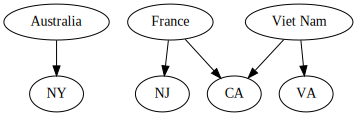

In [15]:
#Q13

g = Digraph()
g.node("Australia", "Australia")
g.node("France", "France")
g.node("Viet Nam", "Viet Nam")

states_visited = []

for row in df.itertuples():
    # sets up the string to be stored
    ip_ADDress = row[1] #ip of each column
    if lookup_region(ip_ADDress) == "France":
        cik = str(int(row.cik))
        accession = row.accession
        extention = row.extention
        file = cik+ "/" + accession + "/" + extention

        if file in dict_html:
            #print(file)
            value_state = dict_html[file].state()
            
            g.node(value_state,value_state)
            
            if value_state not in states_visited:
                states_visited.append(value_state)
                g.edge("France",value_state)
                
                
    if lookup_region(ip_ADDress) == "Australia":
        cik = str(int(row.cik))
        accession = row.accession
        extention = row.extention
        file = cik+ "/" + accession + "/" + extention

        if file in dict_html:
            #print(file)
            value_state = dict_html[file].state()
            g.node(value_state,value_state)
            g.edge("Australia",value_state)
    if lookup_region(ip_ADDress) == "Viet Nam":
        cik = str(int(row.cik))
        accession = row.accession
        extention = row.extention
        file = cik+ "/" + accession + "/" + extention

        if file in dict_html:
            #print(file)
            value_state = dict_html[file].state()
            g.node(value_state,value_state)
            g.edge("Viet Nam",value_state)
g

In [16]:
#Q14

#what are the most commonly seen street addresses?

dict_addresses = {}
all_addresses = []   


for row in df.itertuples():
    # sets up the string to be stored
    cik = str(int(row.cik))
    accession = row.accession
    extention = row.extention
    file = cik+ "/" + accession + "/" + extention
    #print(key)
    if file in dict_html:
        #print(key)
        #print(len(dict_html[key].addresses))
        for street in dict_html[file].addresses:
            #print(street)
            all_addresses.append(street)

for st_place in all_addresses:
    #print(addresses_to_be_found)
    if st_place not in dict_addresses:   #I think I'm only counting one address from each filing, 
        #but each filing has more than one address
        dict_addresses[st_place] = 1
    else:
        dict_addresses[st_place] += 1



new_dict_addresses = {}

for key in dict_addresses:
    if dict_addresses[key] > 224:
        new_dict_addresses[key] = dict_addresses[key]
    
new_dict_addresses         

{'801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102': 720,
 '801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102\n817-334-4100': 464,
 '1114 AVENUE OF THE AMERICAS\n29TH FLOOR\nNEW YORK NY 10036': 356,
 '1 SANSOME ST\n30TH FL\nSAN FRANCISCO CA 94104': 305,
 '1 SANSOME ST\n30TH FL\nSAN FRANCISCO CA 94104\n3125066500': 264,
 '1251 AVENUE OF THE AMERICAS\nNEW YORK NY 10020': 225,
 '1251 AVENUE OF THE AMERICAS\nNEW YORK NY 10020\n212-956-2221': 225,
 '1177 WEST HASTINGS STREET\nSUITE 2300\nVANCOUVER A1 V6E 2K3': 225,
 '1177 WEST HASTINGS STREET\nSUITE 2300\nVANCOUVER A1 V6E 2K3\n604-683-6332': 225,
 '10119 W. LARIAT LANE\nPEORIA AZ 85383': 289,
 '10119 W. LARIAT LANE\nPEORIA AZ 85383\n425-442-0931': 289,
 '1881 GROVE AVENUE\nRADFORD VA 24141': 277}

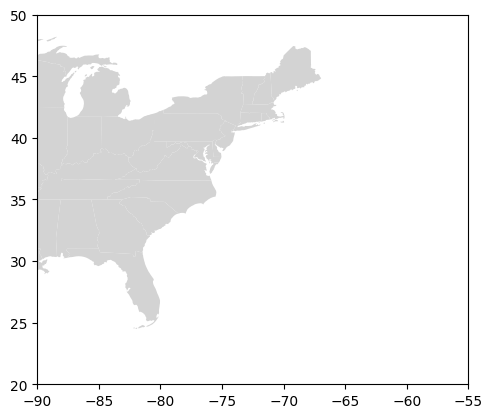

In [17]:
#Q15

#geographic plotting of postal code

backdrop = gpd.read_file("shapes/cb_2018_us_state_20m.shp")
locations = gpd.read_file("locations.geojson").to_crs("EPSG:3035")

ax = backdrop.plot(color = "lightgray")
locations.plot(color = "r",ax=ax)
ax.set_xlim(-90,-55)
ax.set_ylim(20,50)

locations.loc[locations['address'] == "[94111]"].index

locations["address"] =  [re.findall(r"[A-Z][A-Z] (\d{5})-?", str(x)) for x in locations["address"]]


# for postal_stamp in locations["address"]:
#     #print(len(postal_stamp))
# # locations.drop(locations[len(locations['address']) == 1].index, inplace = True)
#     if postal_stamp.empty == True:
#         #print(str(postal_stamp[0]))
#         locations.drop(locations[locations["address"]])
#     else:
#         print(postal_stamp)
# # locations["postal codes"] = re.findall(r"(\d{5})-?",locations["postal codes"])


#locations["address"]